# Maximal Marginal Relevance in RAG Retrieval
* Notebook by Adam Lang
* Date: 9/18/2024

# Overview
* We will go over what MMR is and how to implement it.

# What is MMR
* MMR is a search type which specificies your Retrieval Method
* The Maximal Marginal Relevance (MMR) criterion strives to **reduce redundancy** while maintaining query relevance in re-ranking retrieved documents.
* When it comes to retrieving documents, the majority of methods will do a similarity metric like cosine similarity, euclidean distance, or dot product.
   * All of these will return documents that are most similar to your query/question.

* However, what if you want similar documents which are **also diverse** from each other?
   * That is where Maximum Marginal Relevance (MMR) steps in.

* The goal is to take into account how similar retrieved documents are to each other when determining which to return.
   * In theory, you should have a well rounded, diverse set of documents.

# Where in the RAG pipeline is MMR?
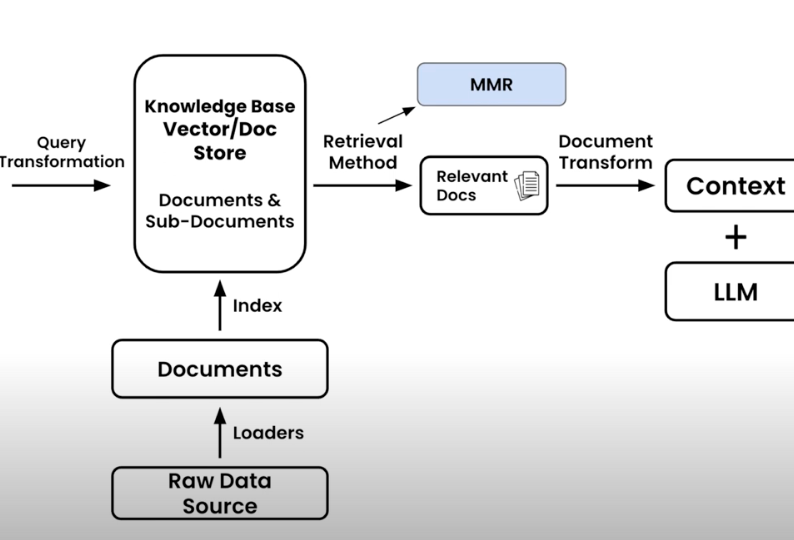

# Implementation of MMR

pip install these

In [ ]:
!pip install langchain==0.2.0
#!pip install langchain-openai
!pip install langchain-community==0.2.0
!pip install langchain-huggingface==0.0.1
!pip install --quiet langchain_experimental ## need this for semantic splitters
!pip install -qU faiss-cpu ## faiss vector db (if using)
!pip install -qU chromadb ## chroma vector db (if using)

  Using cached langchain-0.2.0-py3-none-any.whl.metadata (13 kB)
  Using cached langchain_core-0.2.40-py3-none-any.whl.metadata (6.2 kB)
  Using cached langchain_text_splitters-0.2.4-py3-none-any.whl.metadata (2.3 kB)
Using cached langchain-0.2.0-py3-none-any.whl (973 kB)
Using cached langchain_core-0.2.40-py3-none-any.whl (396 kB)
Using cached langchain_text_splitters-0.2.4-py3-none-any.whl (25 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.1
    Uninstalling langchain-core-0.3.1:
      Successfully uninstalled langchain-core-0.3.1
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.0
    Uninstalling langchain-text-splitters-0.3.0:
      Successfully uninstalled langchain-text-splitters-0.3.0
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.0
    Uninstalling langchain-0.3.0:
      Successfully uninstalled langchain-0.3.0
ERROR: pip's dependency r

In [ ]:
!pip install --upgrade langchain-community langchain-core

In [ ]:
!pip install --force-reinstall langchain-experimental==0.3.0

  Using cached langchain_experimental-0.3.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_community-0.3.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached langchain_core-0.3.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached aiohttp-3.10.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached langchain-0.3.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached langsmith-0.1.123-py3-none-any.whl.metadata (13 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pydantic_settings-2.5.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.w

In [1]:
!pip install --upgrade langchain-huggingface langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-openai
    Found existing installation: langchain-openai 0.1.7
    Uninstalling langchain-openai-0.1.7:
      Successfully uninstalled langchain-openai-0.1.7
  Attempting uninstall: langchain-huggingface
    Found existing installation: langchain-huggingface 0.0.1
    Uninstalling langchain-huggingface-0.0.1:
      Successfully uninstalled langchain-huggingface-0.0.1


In [2]:
from getpass import getpass

OPENAI_KEY = getpass('Enter your OPENAI API Key: ')

Enter your OPENAI API Key: ··········


In [3]:
from getpass import getpass

HUGGINGFACEHUB_API_TOKEN = getpass('Enter your HuggingFace Auth Token: ')

Enter your HuggingFace Auth Token: ··········


# Environment Variables


In [4]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ['HUGGINGFACEHUB_API_TOKEN'] = HUGGINGFACEHUB_API_TOKEN

# HuggingFace Embeddings
* HuggingFace Embedding Models - Open Source
* You can use the `langchain-community` or the `langchain-huggingface` package which is new.
* `langchain-huggingface` integrates easily with

* LangChain which allows us to use just about any HuggingFace embedding model in the LangChain ecosystem.
* HuggingFaceEmbeddings uses `sentence-transformers` embeddings "under the hood".
* This computes embeddings locally which will utilize your local computer memory/RAM/resources to access embedding LLMs from HuggingFace

In [5]:
# import the library
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

# model we will use: https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1
model_name = 'mixedbread-ai/mxbai-embed-large-v1'


# instantiate with huggingface embeddings from langchain
hf_embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
)



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/114k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

Set `embedding` variable

In [ ]:
## embeddings
embedding = hf_embeddings


# Libraries to load for MMR

In [6]:
## imports
from langchain.document_loaders import DirectoryLoader
#from langchain.embeddings.openai import OpenAIEmbeddings ## if use openai embeddings


## vector stores
from langchain.vectorstores import Chroma ##vector store
from langchain.document_loaders import WebBaseLoader

## Imports for Chunking/Splitting

In [7]:
from langchain_experimental.text_splitter import SemanticChunker

## Recursive Text splitter
#from langchain.text_splitter import RecursiveCharacterTextSplitter ## standard text splitter


# Load a document, Split + Chunk
* in this case we can load an entire website.

### Load a Document

In [8]:
# Loading a single website
loader = WebBaseLoader("http://www.paulgraham.com/wealth.html")

## load another doc - csv?
## add here


## create docs
docs = loader.load()


In [41]:
## import numpy
import numpy as np

### 1. Recursive Splitter Method

In [ ]:
# Recursive Chunker
recur_text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=0)
recur_chunks = recur_text_splitter.split_documents(docs)

print (f"Your {len(docs)} documents have been split into {len(recur_chunks)} chunks")

Your 1 documents have been split into 28 chunks


### 2. Semantic Splitter Method
* Source langchain docs: https://python.langchain.com/docs/how_to/semantic-chunker/

#### Method 1: Percentile Splitter
* Default way to split is based on percentile.
* In this method, all differences between sentences are calculated, and then any difference greater than the X percentile is split.

In [10]:
## Semantic chunker - percentile
sem_text_splitter_perc = SemanticChunker(embeddings=hf_embeddings, breakpoint_threshold_type="percentile")


## create chunks
sem_chunks_perc = sem_text_splitter_perc.split_documents(docs)

In [40]:
## how many docs
print (f"Your {len(docs)} documents have been split into {len(sem_chunks_perc)} chunks")

Your 1 documents have been split into 24 chunks


In [42]:
## sqrt of N
np.sqrt(24)


4.898979485566356

#### Method 2: Standard Deviation
* Any difference greater than X standard deviations is split.

In [52]:
## semantic chunker - standard deviation
sem_text_splitter_std = SemanticChunker(embeddings=embedding, breakpoint_threshold_type='standard_deviation')

## create chunks
sem_chunks_std = sem_text_splitter_std.split_documents(docs)

In [65]:
## how many docs
print (f"Your {len(docs)} documents have been split into {len(sem_chunks_std)} chunks")

Your 1 documents have been split into 5 chunks


In [70]:
np.sqrt(5)

2.23606797749979

#### Method 3: Interquartile
* The interquartile distance is used to split chunks.



In [62]:
## semantic chunker - interquartile distance
sem_text_splitter_IQ = SemanticChunker(embeddings=embedding, breakpoint_threshold_type='interquartile')

## create chunks
sem_chunks_IQ = sem_text_splitter_IQ.split_documents(docs)

In [66]:
## how many docs
print (f"Your {len(docs)} documents have been split into {len(sem_chunks_std)} chunks")

Your 1 documents have been split into 5 chunks


In [69]:
np.sqrt(5)

2.23606797749979

#### Method 4: Gradient
* The **gradient of distance** is used to split chunks along with the percentile method.
* This is useful when chunks are **highly correlated with each other or specific to a domain e.g. legal or medical.**
* The idea is to apply **anomaly detection on gradient array** so that the distribution become wider and easy to identify boundaries in highly semantic data.



In [63]:
## semantic chunker - gradient
sem_text_splitter_grad = SemanticChunker(embeddings=embedding, breakpoint_threshold_type='gradient')

## create chunks
sem_chunks_grad = sem_text_splitter_grad.split_documents(docs)

In [67]:
## how many docs
print (f"Your {len(docs)} documents have been split into {len(sem_chunks_grad)} chunks")

Your 1 documents have been split into 24 chunks


In [68]:
np.sqrt(24)

4.898979485566356

# Vector Storage
* Create embeddings and store in Vector database of choice.

## Chroma DB setup

In [ ]:
# instantiate vector database
## Chroma vector database
chroma_db = Chroma.from_documents(documents=chunks, embedding=embedding)

## FAISS Vector Store Creation

In [64]:
import faiss
#from langchain_community.docstore.in_memory import InMemoryDocstore -- only if using indexing
from langchain_community.vectorstores import FAISS

faiss_db = FAISS.from_documents(documents=sem_chunks_grad, embedding=embedding) # data base creation

# Retrievers
1. "Vanilla" Retriever --> top-k similarity search
2. "MMR" - maximal marginal relevance retriever.
* We will test both out and see what the results are.

## Chroma Vector DB

In [ ]:
## vanilla topk retriever
retriever_vanilla = chroma_db.as_retriever(search_type='similarity',search_kwargs={"k": 5}) ##base this off sqrt(N) for now


## MMR retriever
chroma_retriever_mmr = chroma_db.as_retriever(search_type='mmr', search_kwargs={'k': 5}) ## base of sqrt(N) for now

## FAISS Vector Library
* open source

In [71]:
## vanilla topk retriever
retriever_vanilla = faiss_db.as_retriever(search_type='similarity', search_kwargs={'k': 5}) ##base this off sqrt(N) for now


## MMR retriever
faiss_retriever_mmr = faiss_db.as_retriever(search_type='mmr', search_kwargs={'k': 5}) ##base this off sqrt(N) for now


# Get Relevant Documents from Vector Store
* Use the SAME query to test result.

In [72]:
## vanilla topk relevant docs
vanilla_relevant_docs = retriever_vanilla.get_relevant_documents("What is the best way to make and keep wealth?")

### Input MMR retriever of choice

In [73]:
## chroma mmr relevant docs
#mmr_relevant_docs = chroma_retriever_mmr.get_relevant_documents("What is the best way to make and keep wealth?")

## fais mmr relevant docs
mmr_relevant_docs = faiss_retriever_mmr.get_relevant_documents("What is the best way to make and keep wealth?")

# Analysis of Retrieval Similarity + Diversity

In [74]:
import pandas as pd

In [75]:
## function for this
def analyze_list_overlap(list1, list2, content_attr='page_content'):
    """
    Analyze the overlap and uniqueness between two lists of objects using a specified content attribute.

    Parameters:
    list1 (list): The first list of objects to compare.
    list2 (list): The second list of objects to compare.
    content_attr (str): The attribute name of the content to use for comparison.

    Returns:
    dict: A dictionary with counts of overlapping, unique to list1, unique to list2 items,
          and total counts for each list.
    """
    # Extract unique content attributes from the lists
    set1_contents = {getattr(doc, content_attr) for doc in list1}
    set2_contents = {getattr(doc, content_attr) for doc in list2}

    # Find the number of overlapping content attributes
    overlap_contents = set1_contents & set2_contents
    overlap_count = len(overlap_contents)

    # Find the unique content attributes in each list
    unique_to_list1_contents = set1_contents - set2_contents
    unique_to_list2_contents = set2_contents - set1_contents
    unique_to_list1_count = len(unique_to_list1_contents)
    unique_to_list2_count = len(unique_to_list2_contents)

    # Use the unique content attributes to retrieve the unique objects
    unique_to_list1 = [doc for doc in list1 if getattr(doc, content_attr) in unique_to_list1_contents]
    unique_to_list2 = [doc for doc in list2 if getattr(doc, content_attr) in unique_to_list2_contents]

    # Count the total number of items in each list
    total_list1 = len(list1)
    total_list2 = len(list2)

    # results to dictionary
    results_dict = {
        'TopK_total_docs': total_list1,
        'MMR_total_docs': total_list2,
        'Overlap_count': overlap_count,
        'Unique_TopK_count': unique_to_list1_count,
        'Unique_MMR_count': unique_to_list2_count,
        'TopK_unique_docs': unique_to_list1,
        'MMR_unique_docs': unique_to_list2
    }
    # return dataframe
    df = pd.DataFrame([results_dict])

    return df.T


In [76]:
## comparison
df_final = analyze_list_overlap(vanilla_relevant_docs, mmr_relevant_docs)
df_final

,0
TopK_total_docs,5
MMR_total_docs,5
Overlap_count,3
Unique_TopK_count,2
Unique_MMR_count,2
TopK_unique_docs,[page_content='You haven't made anyone else po...
MMR_unique_docs,[page_content='You could probably\nwork twice ...


In [77]:
df_final.reset_index()

,index,0
0,TopK_total_docs,5
1,MMR_total_docs,5
2,Overlap_count,3
3,Unique_TopK_count,2
4,Unique_MMR_count,2
5,TopK_unique_docs,[page_content='You haven't made anyone else po...
6,MMR_unique_docs,[page_content='You could probably\nwork twice ...


In [78]:
df_final.iloc[6].to_list()

[[Document(metadata={'source': 'http://www.paulgraham.com/wealth.html', 'title': 'How to Make Wealth', 'language': 'No language found.'}, page_content="You could probably\nwork twice as many hours as a corporate employee, and if\nyou focus you can probably get three times as much done in\nan hour. [1]\nYou should get another multiple of two, at\nleast, by eliminating the drag \nof the pointy-haired middle\nmanager who would be your boss in a big company. Then there is one more multiple: how much smarter are you\nthan your job description expects you to be? Suppose another multiple of three. Combine all these multipliers, and I'm\nclaiming you could be 36 times more \nproductive than you're expected to be in a random corporate\njob. [2]\n  If a fairly good hacker is worth $80,000 a year at a \nbig company, then a smart\nhacker working very hard without any corporate\nbullshit to slow him down should be able to do work worth about\n$3 million a year.Like all back-of-the-envelope calculat

Summary:
* Using a semantic splitter with the "percentage" or the "gradient" setting both split into similar amount of chunks (24), whereas the "standard deviation" and the "interquartile" semantic splitters split into only a few chunks.
* The unique documents retrieved from the MMR ends up being about 2.